<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 (Problem 1) - Sentiment Analysis Model  (Group)</h2><h3>AY2021/22 Semester</h3></th>
    </tr>
</table>

In [2]:
# Import the Required Packages

#Basic python packages
import numpy as np
import pandas as pd
import nltk
import re
import string

#loading and preprocessing data
import tensorflow.keras
import os, shutil
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical

#model making
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU

#optimizers
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

#regularizers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#testing
from tensorflow.keras.models import load_model

## Step 1 – Data Loading and Processing (Group)

### 1.1 Data Loading

In [3]:
#Sets base direcetory as the current directory
base_dir = os.getcwd() 

#path to reveiw data
reviews_dir = 'macdonalds_reviews.csv' #Set the reviews directory from loading the data reviews

#Extracts csv information and puts it in a dataframe
reviews = pd.read_csv(reviews_dir, encoding="utf8")
#https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/import-csv-files-pandas-dataframes/


In [4]:
#print out reviews
reviews

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGPq-8LyHiMTNXU216EeMbZv0vbeUrcLNKQuSr...,Harith Bolhi,https://play-lh.googleusercontent.com/a-/AOh14...,Slow gila management,1,0,2.23.1,2021-07-11 14:08:26,NaN,NaN
1,gp:AOqpTOHrGSZxs32JpFDMuY1zjZ4oTqyGJU_9kS2r4ZN...,ahmad gouda,https://play-lh.googleusercontent.com/a-/AOh14...,Bad app,1,0,NaN,2021-07-11 12:36:06,NaN,NaN
2,gp:AOqpTOFgvhDSTrHxsa95OR_-gMKIbQPArQpFLnBYQfH...,Iwan Langitan,https://play-lh.googleusercontent.com/a-/AOh14...,Otp code never receive bad...,1,0,NaN,2021-07-11 12:12:44,NaN,NaN
3,gp:AOqpTOFt54B_DiDLR2BZt72Zg-iE2e5trTFWcCp3ahu...,muhamad faez,https://play-lh.googleusercontent.com/a-/AOh14...,Stupid app...say my device did not pass securi...,1,0,2.23.1,2021-07-11 10:19:40,NaN,NaN
4,gp:AOqpTOGmQzwBWWYh6ov5Lgxwpfxob21m2E0674WFJeS...,DJ KNOXX SA,https://play-lh.googleusercontent.com/a-/AOh14...,The app is not working and wants an update jus...,1,0,2.23.1,2021-07-11 09:44:01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
100029,gp:AOqpTOEN3m_Ytja3dRXCie-eAZMPOUsWla501__tg__...,Remi Mesut,https://play-lh.googleusercontent.com/a-/AOh14...,Nedense şubeye gidince çalışmıyor ...,1,0,2.5.4,2020-06-12 03:12:04,NaN,NaN
100030,gp:AOqpTOEwSBYSeWSqfuOwBNgMhLJpi3xMK4Nkyd7sV73...,nidhin thomas,https://play-lh.googleusercontent.com/a-/AOh14...,Good :),5,0,2.5.3,2020-06-12 01:59:34,NaN,NaN
100031,gp:AOqpTOEWX_17hzmzkUU4XRD9sb_ybOYerk-g9kvfiCV...,Bahaa Abdeen,https://play-lh.googleusercontent.com/a/AATXAJ...,خدمة العملاء سيئة جداً جداً,1,0,2.5.4,2020-06-12 00:55:53,NaN,NaN
100032,gp:AOqpTOFymEEpfl7bkpIO3eehU48rnnrHVWFqhGukfvA...,SirajMunir,https://play-lh.googleusercontent.com/a-/AOh14...,McDonald's Tq,5,0,2.5.4,2020-06-12 00:34:55,NaN,NaN


In [5]:
#put content into a list
content = reviews.iloc[:,3].tolist()

#put score into a list
score = reviews.iloc[:,4].tolist()

#https://towardsdatascience.com/extract-rows-columns-from-a-dataframe-in-python-r-678e5b6743d6
#https://cmdlinetips.com/2020/04/how-to-get-column-names-as-list-in-pandas/

### 1.2 Data Processing


In [6]:
#check for Nan in data
for i in content:
    if isinstance (i, str) == False:
        print(i)
        print(type(i))

nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>


In [7]:
#grab content and score from dataframe
reviews = reviews.loc[:,['content','score']]
#drop all Nan in data
reviews.dropna(inplace=True)

In [8]:
reviews

,content,score
0,Slow gila management,1
1,Bad app,1
2,Otp code never receive bad...,1
3,Stupid app...say my device did not pass securi...,1
4,The app is not working and wants an update jus...,1
...,...,...
100029,Nedense şubeye gidince çalışmıyor ...,1
100030,Good :),5
100031,خدمة العملاء سيئة جداً جداً,1
100032,McDonald's Tq,5


In [9]:
#retive content and score from new dataframe 
content = reviews.iloc[:,0].tolist()
score = reviews.iloc[:,1].tolist()

#prints all unique characters in the content
content_items = ""
for item in content:
    content_items += item+" "
unique_characters = sorted(list(set(content_items)))
print(unique_characters)

['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '£', '§', '®', '°', '²', '¿', 'Á', 'Ä', 'Å', 'Æ', 'Ç', 'È', 'É', 'Í', 'Î', 'Ö', '×', 'Ú', 'Ü', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ø', 'ù', 'ú', 'ü', 'ý', 'Ā', 'ā', 'ă', 'ą', 'ć', 'Č', 'č', 'ď', 'Đ', 'đ', 'Ē', 'ē', 'ė', 'ę', 'ě', 'ğ', 'Ī', 'ī', 'į', 'İ', 'ı', 'ķ', 'ĺ', 'ł', 'ń', 'ņ', 'Ő', 'ő', 'ř', 'ś', 'Ş', 'ş', 'Š', 'š', 'ť', 'ũ', 'ū', 'ů', 'ű', 'ų', 'ź', 'Ż', 'ż', 'Ž', 'ž', 'Ə', 'ơ', 'ư', 'ș', 'ț', 'ə', 'ʖ', 'Έ', 'Α', 'Ε

In [10]:
#function to preprocess data
def pre_process(text):
    
    # lowercase
    lower_text=text.lower()
    
    #remove most odd characters
    half_clean = lower_text.encode("ascii","ignore").decode()
    
    #remove special characters and digits
    nopunct_text=re.sub("(\\d|\\W|_)+"," ", half_clean)
    
    
    #return cleaned data
    return nopunct_text

In [11]:
cleaned_reviews = pd.DataFrame()

#run data through pre_process
cleaned_reviews["content"] = reviews["content"].apply(lambda x:pre_process(x))

#convert dataframe into a list
cleaned_reviews_list = cleaned_reviews["content"].tolist()

In [12]:
cleaned_reviews_list

['slow gila management',
 'bad app',
 'otp code never receive bad ',
 'stupid app say my device did not pass security check my redmi is stock phone and your staff say the promotion meal only can buy thru app so how',
 'the app is not working and wants an update just after i downloaded it ',
 'too slow ',
 'absolutely useless app to order from the staff at the counters have no idea how to drive them nor help a customer they stick with the line what ever is on the app you get the same even if i would like to upgrade paying a price i get the standard line repeated to me lovely customer service ain t it i guess i can say i ain t loving it ',
 'worst app experience the staff themselves doesn t know how the app works ',
 'my favorite food',
 'lovely one',
 'hug',
 'amazing',
 ' ',
 'good ',
 'mc do doesn t reward all points you deserve',
 'iggh',
 'awesome ',
 'excellent',
 'not able to downlaod update',
 'they should just reconsider this app is useless it never works always says something w

In [13]:
final_cleaned_reviews_list = []
final_score = []

for i in range(len(cleaned_reviews_list)):
    # if review is not empty
    if cleaned_reviews_list[i] != "":
        #if review has words
        if cleaned_reviews_list[i].isspace() == False:
            #add to content to new list
            final_cleaned_reviews_list += [cleaned_reviews_list[i]]
            #add to content's corresponding score to new list
            final_score += [score[i]]

In [14]:
content_cleaned_final = pd.DataFrame()
content_cleaned_final["content"] = final_cleaned_reviews_list 
content_cleaned_final["score"] = final_score 

In [15]:
content_cleaned_final

,content,score
0,slow gila management,1
1,bad app,1
2,otp code never receive bad,1
3,stupid app say my device did not pass security...,1
4,the app is not working and wants an update jus...,1
...,...,...
95975,the app just does not work beyond happily remo...,1
95976,nedense ubeye gidince almyor,1
95977,good,5
95978,mcdonald s tq,5


In [16]:
#Checking to see if cleaned content has no more invalid characters
unique_characters_final = ""

for item in final_cleaned_reviews_list:
    unique_characters_final += item+" "
unique_characters_final = sorted(list(set(unique_characters_final)))
print(unique_characters_final)

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


### 1.3 Data Sampling

In [17]:
# Convert the content and scores into numeric tensors

# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
#80% train samples, 20% test samples
tokenizer = Tokenizer() 

X_train, X_test, y_train, y_test = train_test_split(final_cleaned_reviews_list, final_score, test_size=0.2)
maxlen = 20  
#Rank the words based on popularity, more words has a smaller index

tokenizer.fit_on_texts(final_cleaned_reviews_list)
word_index = tokenizer.word_index #Each word map to an index; learnt through text data
print('Found %s unique tokens.' % len(word_index))

#Converting the training reviews to numbers
X_train_sequences = tokenizer.texts_to_sequences(X_train)
#Converting the training test reviews to number
X_test_sequences = tokenizer.texts_to_sequences(X_test)


#Make reviews have a uniform length
X_train_padded_sequences = pad_sequences(X_train_sequences, maxlen=maxlen)
X_test_padded_sequences = pad_sequences(X_test_sequences, maxlen=maxlen)
print('Shape of X_train tensor:', X_train_padded_sequences.shape)
print('Shape of X_test tensor:', X_test_padded_sequences.shape)

#convert y data into numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

#Converting integers in y_train and y_test to binary class matrix
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)


Found 20651 unique tokens.
Shape of X_train tensor: (76784, 20)
Shape of X_test tensor: (19196, 20)
Shape of y_train: (76784, 6)
Shape of y_test: (19196, 6)


In [18]:
#check sample data
print(X_test[:5])
print(X_train[:5])
print(y_train[:5])
print(y_test[:5])

['fails to connects consistently for a few days so far uninstalled and reinstalled the app but the problem persists i keep getting the following error message after seconds of the app stuck on the opening screen unfortunately this section requires that you have an internet connection well i m pretty sure my connection is working perfectly fine as i m using it to post this review ', 'one hour of trying to sign up please check if you have latest version appears when i have just downloaded the app everyone is starving frustrating to say the least unable to order deleted ', 'mcdonald s app is a joke it requires items where it shouldn t need i wonder if this is a spyware ', 'useless why would i install an app that i need to show the order to a cashier too ', ' user friendly only language i can choose it s dutch i had problems with it multiple times and to claim coupons i need constant internet access and help of the cashiers ']
['both phone and app can t work', 'werkt niet meer sinds recent

## Step 2 – Develop a Sentiment Analysis Model (Individual: One Model Per Student)

### Model #1  (Student Name: Edward)

In [18]:
# Build the Model
model = Sequential()
#model.add(Embedding(len(word_index)+1, 64))
model.add(Embedding(len(word_index)+1, 32))
model.add(SimpleRNN(64, recurrent_dropout = 0.1, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(SimpleRNN(64, recurrent_dropout = 0.1, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(SimpleRNN(64, recurrent_dropout = 0.1, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(SimpleRNN(64, recurrent_dropout = 0.1))
model.add(layers.Dropout(0.1))
model.add(Dense(6, kernel_regularizer=regularizers.l2(0.1), activation='softmax'))

model.summary()
optimizer = optimizers.SGD(lr=0.01)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          660864    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 64)          6208      
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 64)          0

In [19]:
# Train the Model
#optimizer = optimizers.RMSprop(lr=0.01)
#optimizer = optimizers.Adam(lr=0.01)
optimizer = optimizers.SGD(lr=0.01)

model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train_padded_sequences, y_train,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.2)



Train on 61427 samples, validate on 15357 samples
Epoch 1/40
61427/61427 [==============================] - 92s 1ms/sample - loss: 1.1736 - acc: 0.6453 - val_loss: 1.0036 - val_acc: 0.6677
Epoch 2/40
61427/61427 [==============================] - 85s 1ms/sample - loss: 0.9578 - acc: 0.7016 - val_loss: 0.8533 - val_acc: 0.7577
Epoch 3/40
61427/61427 [==============================] - 85s 1ms/sample - loss: 0.8340 - acc: 0.7659 - val_loss: 0.7628 - val_acc: 0.7956
Epoch 4/40
61427/61427 [==============================] - 84s 1ms/sample - loss: 0.7801 - acc: 0.7874 - val_loss: 0.7394 - val_acc: 0.8035
Epoch 5/40
61427/61427 [==============================] - 83s 1ms/sample - loss: 0.7448 - acc: 0.7999 - val_loss: 0.7406 - val_acc: 0.7996
Epoch 6/40
61427/61427 [==============================] - 83s 1ms/sample - loss: 0.7212 - acc: 0.8096 - val_loss: 0.7263 - val_acc: 0.8041
Epoch 7/40
61427/61427 [==============================] - 83s 1ms/sample - loss: 0.7054 - acc: 0.8140 - val_loss: 0.

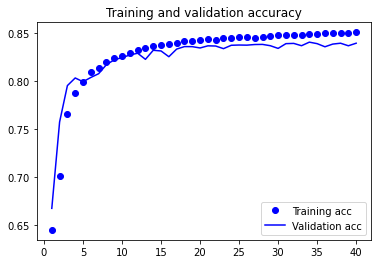

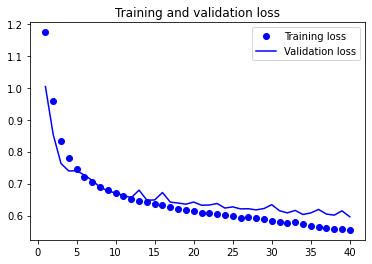

In [20]:
# Plot the Training and Validation Accuracy & Loss Scores

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
# Save the Model
model.save('text_model_edward.h5')

### Model #2  (Student Name: Dexter)

In [18]:
#Build the Model - SGD with lr = 0.01 - SimpleRNN - +2 layers and x16 embedding layers and neurons - batch size = 8
model = Sequential()

model.add(Embedding(len(word_index)+1, 128))
model.add(SimpleRNN(256, return_sequences=True))
model.add(SimpleRNN(256, return_sequences=True))
model.add(SimpleRNN(256, return_sequences=True))
model.add(SimpleRNN(256))
model.add(Dense(6, activation='softmax'))


model.summary()

# Train the Model

optimizer = optimizers.SGD(lr = 0.01)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train_padded_sequences, y_train,
                    epochs=60,
                    batch_size=8,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2643456   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 256)         98560     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 256)         131328    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 256)         131328    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 256)               131328    
_________________________________________________________________
dense (Dense)                (None, 6)                 1542      
Total params: 3,137,542
Trainable params: 3,137,542
Non-trainable params: 0
______________________________________________

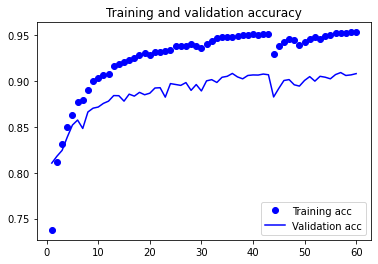

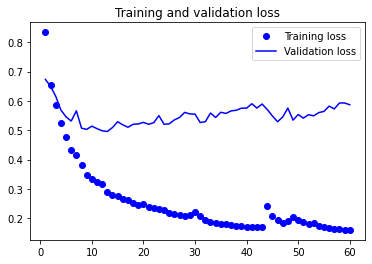

In [19]:
# Plot the Training and Validation Accuracy & Loss Scores
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [49]:
#Save the Model
model.save('text_model_dexter_60.h5')

### Model #3  (Student Name: Isha)

In [21]:
# Build the Model
from tensorflow.keras.layers import Dropout
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(64, dropout=0, recurrent_dropout=0.5, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, dropout=0, recurrent_dropout=0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          660864    
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 64)          24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 698,310
Trainable params: 698,310
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Train the Model
model.compile(optimizer= 'rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded_sequences, y_train,
                    epochs=25, batch_size=32,
                    validation_split=0.2)

Epoch 1/25
1920/1920 [==============================] - 51s 25ms/step - loss: 0.7058 - acc: 0.7867 - val_loss: 0.6394 - val_acc: 0.8139
Epoch 2/25
1920/1920 [==============================] - 56s 29ms/step - loss: 0.6141 - acc: 0.8226 - val_loss: 0.6206 - val_acc: 0.8185
Epoch 3/25
1920/1920 [==============================] - 56s 29ms/step - loss: 0.5867 - acc: 0.8317 - val_loss: 0.6035 - val_acc: 0.8243
Epoch 4/25
1920/1920 [==============================] - 56s 29ms/step - loss: 0.5617 - acc: 0.8384 - val_loss: 0.5971 - val_acc: 0.8280
Epoch 5/25
1920/1920 [==============================] - 55s 29ms/step - loss: 0.5421 - acc: 0.8429 - val_loss: 0.5865 - val_acc: 0.8304
Epoch 6/25
1920/1920 [==============================] - 56s 29ms/step - loss: 0.5244 - acc: 0.8467 - val_loss: 0.5810 - val_acc: 0.8297
Epoch 7/25
1920/1920 [==============================] - 56s 29ms/step - loss: 0.5097 - acc: 0.8508 - val_loss: 0.5796 - val_acc: 0.8301
Epoch 8/25
1920/1920 [==========================

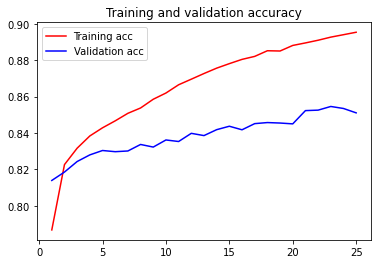

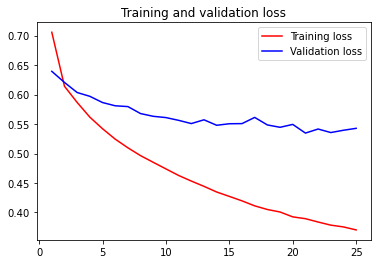

In [23]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
# Save the Model
model.save('text_model_isha.h5')

### Model #4  (Student Name: Hiong Kai)

In [35]:
# Build the Model           
model = Sequential()
model.add(Embedding(len(word_index)+1, 32)) 
model.add(SimpleRNN(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(128))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          660864    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 128)         20608     
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 128)         32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

In [36]:
# Train the Model
model.compile(optimizer=optimizers.RMSprop(lr=1e-3), loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train_padded_sequences, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.2)

Train on 61427 samples, validate on 15357 samples
Epoch 1/50
61427/61427 [==============================] - 24s 394us/sample - loss: 0.9168 - acc: 0.6859 - val_loss: 0.6400 - val_acc: 0.8212
Epoch 2/50
61427/61427 [==============================] - 10s 160us/sample - loss: 0.6221 - acc: 0.8239 - val_loss: 0.5957 - val_acc: 0.8300
Epoch 3/50
61427/61427 [==============================] - 10s 165us/sample - loss: 0.5481 - acc: 0.8428 - val_loss: 0.5628 - val_acc: 0.8403
Epoch 4/50
61427/61427 [==============================] - 10s 163us/sample - loss: 0.4826 - acc: 0.8607 - val_loss: 0.5351 - val_acc: 0.8480
Epoch 5/50
61427/61427 [==============================] - 10s 164us/sample - loss: 0.4301 - acc: 0.8760 - val_loss: 0.5163 - val_acc: 0.8563
Epoch 6/50
61427/61427 [==============================] - 10s 164us/sample - loss: 0.3869 - acc: 0.8896 - val_loss: 0.5114 - val_acc: 0.8618
Epoch 7/50
61427/61427 [==============================] - 10s 162us/sample - loss: 0.3518 - acc: 0.8993 

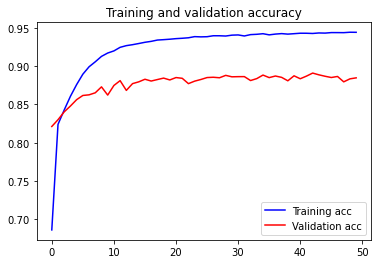

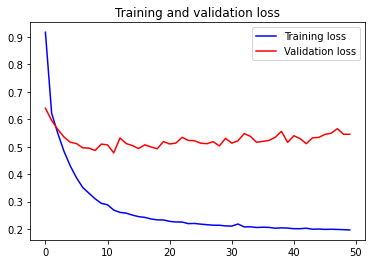

In [40]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show() 

In [10]:
# Save the Model
model.save('text_model_hiongkai.h5')

### Model #5  (Student Name: Ben)

In [18]:
# Build the Model
model = Sequential()

model.add(Embedding(len(word_index)+1, 128))
model.add(LSTM(128, recurrent_dropout=0.2, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, recurrent_dropout=0.2,))
model.add(Dropout(0.2))

model.add(Dense(6, activation='softmax'))
model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2643456   
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         131584    
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 2,907,398
Trainable params: 2,907,398
Non-trainable params: 0
______________________________________________

In [19]:
# Train the Model
history = model.fit(X_train_padded_sequences, y_train,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.2)

Train on 61427 samples, validate on 15357 samples
Epoch 1/40
61427/61427 [==============================] - 91s 1ms/sample - loss: 0.6530 - acc: 0.8112 - val_loss: 0.5589 - val_acc: 0.8389
Epoch 2/40
61427/61427 [==============================] - 87s 1ms/sample - loss: 0.5178 - acc: 0.8463 - val_loss: 0.5170 - val_acc: 0.8469
Epoch 3/40
61427/61427 [==============================] - 89s 1ms/sample - loss: 0.4534 - acc: 0.8635 - val_loss: 0.4979 - val_acc: 0.8550
Epoch 4/40
61427/61427 [==============================] - 93s 2ms/sample - loss: 0.4018 - acc: 0.8810 - val_loss: 0.4883 - val_acc: 0.8648
Epoch 5/40
61427/61427 [==============================] - 92s 1ms/sample - loss: 0.3607 - acc: 0.8945 - val_loss: 0.4740 - val_acc: 0.8714
Epoch 6/40
61427/61427 [==============================] - 92s 1ms/sample - loss: 0.3273 - acc: 0.9048 - val_loss: 0.4785 - val_acc: 0.8765
Epoch 7/40
61427/61427 [==============================] - 92s 2ms/sample - loss: 0.3064 - acc: 0.9110 - val_loss: 0.

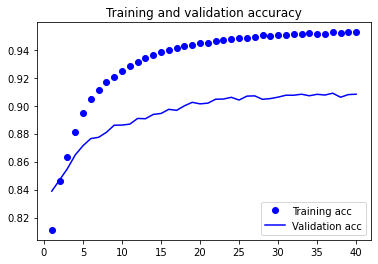

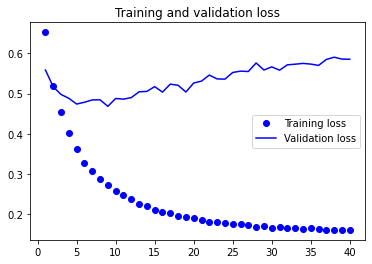

In [20]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
# Save the Model
model.save('text_model_ben.h5')

## Step 3 – Evaluate the Model using Testing Data (Individual & Group)

In [28]:
# Model #1 - Edward

# Build the Model
model1 = Sequential()
model1.add(Embedding(len(word_index)+1, 32))
model1.add(SimpleRNN(64, recurrent_dropout = 0.1, return_sequences=True))
model1.add(layers.Dropout(0.1))
model1.add(SimpleRNN(64, recurrent_dropout = 0.1, return_sequences=True))
model1.add(layers.Dropout(0.1))
model1.add(SimpleRNN(64, recurrent_dropout = 0.1, return_sequences=True))
model1.add(layers.Dropout(0.1))
model1.add(SimpleRNN(64, recurrent_dropout = 0.1))
model1.add(layers.Dropout(0.1))
model1.add(Dense(6, kernel_regularizer=regularizers.l2(0.1), activation='softmax'))

model1.summary()
optimizer = optimizers.SGD(lr=0.01)
model1.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['acc'])


model1.load_weights('text_model_edward.h5')
test_loss,test_acc = model1.evaluate(X_test_padded_sequences,y_test)
print("Edward's Test Acc",test_acc)
print("Edward's Test Loss",test_loss)



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          660864    
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, None, 64)          6208      
_________________________________________________________________
dropout_13 (Dropout)         (None, None, 64)          0         
_________________________________________________________________
simple_rnn_20 (SimpleRNN)    (None, None, 64)          8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, None, 64)          0         
_________________________________________________________________
simple_rnn_21 (SimpleRNN)    (None, None, 64)          8256      
_________________________________________________________________
dropout_15 (Dropout)         (None, None, 64)         

In [19]:
# Model #2 - Dexter

model2 = Sequential()

model2.add(Embedding(len(word_index)+1, 128))
model2.add(SimpleRNN(256, return_sequences=True))
model2.add(SimpleRNN(256, return_sequences=True))
model2.add(SimpleRNN(256, return_sequences=True))
model2.add(SimpleRNN(256))
model2.add(Dense(6, activation='softmax'))


optimizer = optimizers.SGD(lr = 0.01)
model2.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['acc'])
model2.summary()

model2.load_weights('text_model_dexter_60.h5')
test_loss,test_acc = model2.evaluate(X_test_padded_sequences,y_test)
print("Dexter's Test Acc", test_acc)
print("Dexter's Test Loss", test_loss)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2643456   
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 256)         98560     
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 256)         131328    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 256)         131328    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
Total params: 3,137,542
Trainable params: 3,137,542
Non-trainable params: 0
____________________________________________

In [354]:
# Model #3 - Isha

# Build the Model
model3 = Sequential()

model3.add(Embedding(len(tokenizer.index_word)+1, 32))
model3.add(LSTM(64, dropout=0, recurrent_dropout=0.5, return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(32, dropout=0, recurrent_dropout=0.5))
model3.add(Dense(6, activation='softmax'))

model3.compile(optimizer= 'rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model3.summary()

model3.load_weights('text_model_isha_final.h5')
test_loss,test_acc = model3.evaluate(X_test_padded_sequences,y_test)
print("Isha's Test Acc", test_acc)
print("Isha's Test Loss", test_loss)


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 32)          660864    
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 64)          24832     
_________________________________________________________________
dropout_22 (Dropout)         (None, None, 64)          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 198       
Total params: 698,310
Trainable params: 698,310
Non-trainable params: 0
_________________________________________________________________
600/600 [==============================] - 3s 3ms/step - loss: 0.4121 - acc: 0.8867
Isha's Test Acc 0.88674724102

In [21]:
# Model #4 - Hiong Kai

model4 = Sequential()
#model.add(Embedding(100000, 16, input_length=20)) 
model4.add(Embedding(len(word_index)+1, 32))
model4.add(SimpleRNN(128, return_sequences=True))
model4.add(layers.Dropout(0.3))
model4.add(SimpleRNN(128, return_sequences=True))
model4.add(layers.Dropout(0.3))
model4.add(SimpleRNN(128))
model4.add(layers.Dense(6, activation='softmax'))

model4.summary()
model4.compile(optimizer=optimizers.RMSprop(lr=1e-3), loss='categorical_crossentropy', metrics=['acc'])

model4.load_weights('text_model_hiongkai.h5')
test_loss,test_acc = model4.evaluate(X_test_padded_sequences,y_test)
print("Hiong Kai's Test Acc", test_acc)
print("Hiong Kai's Test Loss", test_loss)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          660864    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 128)         20608     
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 128)         32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                

In [352]:
# Model #5 - Ben
from tensorflow.keras.layers import Dropout

# Build the Model
model5 = Sequential()

model5.add(Embedding(len(word_index)+1, 128))
model5.add(LSTM(128, recurrent_dropout=0.2, return_sequences=True))
model5.add(Dropout(0.2))
model5.add(LSTM(128, recurrent_dropout=0.2,))
model5.add(Dropout(0.2))

model5.add(Dense(6, activation='softmax'))

model5.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['acc'])
model5.summary()


model5.load_weights('text_model_ben.h5')
test_loss,test_acc = model5.evaluate(X_test_padded_sequences,y_test)
print("Ben's Test Acc", test_acc)
print("Ben's Test Loss",test_loss)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 128)         2643456   
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
dropout_19 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 774       
Total params: 2,907,398
Trainable params: 2,907,398
Non-trainable params: 0
___________________________________________

In [38]:
# Save the Best Model
model2.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction (Group)

In [91]:
model_best = Sequential()

model_best.add(Embedding(len(word_index)+1, 128))
model_best.add(SimpleRNN(256, return_sequences=True))
model_best.add(SimpleRNN(256, return_sequences=True))
model_best.add(SimpleRNN(256, return_sequences=True))
model_best.add(SimpleRNN(256))
model_best.add(Dense(6, activation='softmax'))


optimizer = optimizers.SGD(lr = 0.01)
model_best.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['acc'])

model_best.load_weights('text_model_best.h5')

In [410]:
# user input
user_input = [input().lower()]
user_sequence = tokenizer.texts_to_sequences(user_input)
user_sequence_padded = pad_sequences(user_sequence, maxlen=maxlen)
#print(user_sequence)
#print(user_sequence_padded)

very difficult to use this app. a lot of problems too. sometimes order doesn't go through and need to place again.


In [411]:
# show the model output using predict function
# show the model output using predict function
print("Review:", user_input[0])
predicted = model_best.predict(user_sequence_padded)
print("Score is: ",np.argmax(predicted))

Review: very difficult to use this app. a lot of problems too. sometimes order doesn't go through and need to place again.
Score is:  1


In [412]:
# user input
user_input = [input().lower()]
user_sequence = tokenizer.texts_to_sequences(user_input)
user_sequence_padded = pad_sequences(user_sequence, maxlen=maxlen)
#print(user_sequence)
#print(user_sequence_padded)

great app. easy to use, with simple and nice design. order process is fast.


In [413]:
# show the model output using predict function
# show the model output using predict function
print("Review:", user_input[0])
predicted = model_best.predict(user_sequence_padded)
print("Score is: ",np.argmax(predicted))

Review: great app. easy to use, with simple and nice design. order process is fast.
Score is:  5
